In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pylab as plt

#load data
data= keras.datasets.imdb

#load the 1000 most frequently used thru out the whole dataset

(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=10000)


17465344/17464789 [==============================] - 7s 0us/step


In [2]:
#display data 
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
#map the words
word_index= data.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [4]:
word_index= {word:(num+3) for word,num in word_index.items()} #keys ==words, val == integers
word_index['<PAD>']= 0 #will be used later to set length for all data
word_index['<START>']=1
word_index['<UNK>']=2
word_index['<UNUSED>']=3

In [5]:
#swap positions of values to keys. Meaning instead of using numbers pointing to words, we have words point to numbers
reverse_word_index= dict([(value, key) for (key, value) in word_index.items()])

In [7]:
#decode toreadable english 
def decode_review(text):
    return " ".join([reverse_word_index.get(i, '?') for i in text]) #get i, if can't find, use ? as default

print(decode_review(train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [8]:
#check length of 2 reviews
print(len(train_data[0]), len(test_data[1]))

218 260


In [9]:
train_data=keras.preprocessing.sequence.pad_sequences(train_data, value=word_index['<PAD>'],
                                                    padding='post', maxlen=256)
train_data=keras.preprocessing.sequence.pad_sequences(test_data, value=word_index['<PAD>'],
                                                    padding='post', maxlen=256)                                                 

In [11]:
#check length of 2 reviews again after truncating
print(len(test_data[0]), len(test_data[1]))

68 260


In [13]:
model= keras.Sequential()
model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) #numbers will be between 0 and 1

In [14]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
#validate the model

#take up to 10000th reviews

x_val=train_data[:10000]
y_val= train_labels[:10000]

x_train= train_data[10000:]
y_train=train_labels[10000:]

#train the model by passing the dataset object to the fit method
#batch_size: how many reviews we will load
fitModel= model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

#evaluate model
result=model.evaluate(test_data, test_labels)
print(result)

Epoch 1/40
30/30 [==============================] - 1s 18ms/step - loss: 0.2772 - accuracy: 0.8904 - val_loss: 1.6015 - val_accuracy: 0.5025
Epoch 2/40
30/30 [==============================] - 1s 17ms/step - loss: 0.2734 - accuracy: 0.8947 - val_loss: 1.6131 - val_accuracy: 0.5027
Epoch 3/40
30/30 [==============================] - 1s 17ms/step - loss: 0.2714 - accuracy: 0.8957 - val_loss: 1.6358 - val_accuracy: 0.5027
Epoch 4/40
30/30 [==============================] - 0s 14ms/step - loss: 0.2696 - accuracy: 0.8964 - val_loss: 1.6368 - val_accuracy: 0.5025
Epoch 5/40
30/30 [==============================] - 0s 12ms/step - loss: 0.2686 - accuracy: 0.8955 - val_loss: 1.6558 - val_accuracy: 0.5018
Epoch 6/40
30/30 [==============================] - 0s 14ms/step - loss: 0.2650 - accuracy: 0.9000 - val_loss: 1.6669 - val_accuracy: 0.5016
Epoch 7/40
30/30 [==============================] - 0s 15ms/step - loss: 0.2648 - accuracy: 0.8972 - val_loss: 1.6978 - val_accuracy: 0.5030
Epoch 8/40
30

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [19]:
#test model
test_review= test_data[0]
predict= model.predict([test_review])
print('Review: '+ decode_review(test_review))
print('Predication: '+ str(predict[0]))
print('Actual: '+ str(test_labels[0]))
print(result)

Review: <START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss
Predication: [0.999946]
Actual: 0


NameError: name 'result' is not defined

In [20]:
#create a plot of accuracy and loss over time
history_dict= fitModel.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

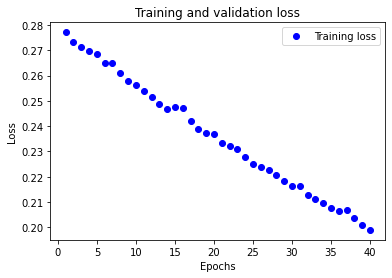

In [21]:
acc = history_dict['accuracy']
val_acc= history_dict['accuracy']
loss = history_dict['loss']
val_loss=history_dict['val_loss']

epochs= range(1, len(acc) + 1)

# 'bo' is for 'blue dot'
plt.plot(epochs, loss, 'bo', label='Training loss')
#b is for 'solid blue line'
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

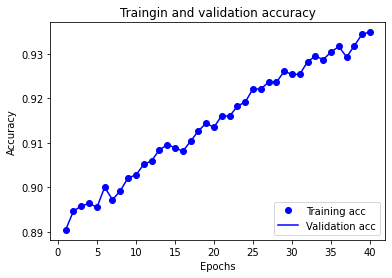

In [23]:
plt.plot(epochs,acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traingin and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()